# Exploring Gender Inequality In The Energy Sector
<hr>
## fix me: add link to github
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/16fgew9rSX1pZYtrqZMu83F0_uUCrDEYG?usp=sharing)

## Overview
| Details            | Information                                                                                        |
|-----------------------|----------------------------------------------------------------------------------------------------|
| Originally Created By | Reece Wayt reecewayt96@gmail.com |
| External References   | https://www.iea.org/topics/energy-and-gender |
| Input Datasets        | https://www.iea.org/data-and-statistics/data-product/gender-and-energy |
| Input Data Source     | #fix me |

## History
| Date         | Developed By  | Reason                                                |
|--------------|---------------|-------------------------------------------------------|
| 6/21/2023 | Reece Wayt | #FIXME|

## Objective

- FIXME
## Explore Yourself
1. Copy this notebook -> File -> Save a Copy in Drive

<hr>

## Imports



In [2]:
#libraries that will be used through this notebook
import math
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
%matplotlib inline 
#data file provided from source, see above. A copy of the data file is included in this repository. 
#es - energy sector
es_data = pd.read_csv('IEA-GenderDiversity-Topic=Employment.csv') 
es_data


,Country,Year,Technology or Sector,Topic,Indicator,Indicator Categories,Unit,Value,Number of observations,updated_at
0,Slovak Republic,2018,Services/goods that are essential to fixed cap...,Employment,Gender employment gap by education level,Less than upper secondary education,Percent,-83.955353,194,1659539394367
1,Norway,2014,Energy,Employment,Gender gap in hours worked by contract type,Temporary contract,Percent,-6.583522,1014,1659539394367
2,Poland,2018,Non-energy,Employment,Gender wage gap conditional on skills by firm ...,Medium,Percent,-17.123211,113376,1659539394367
3,United States,2018,Important energy consumers,Employment,Gender wage gap conditional on skills by occup...,High level (Managers; Professionals; Technicia...,Percent,-26.033720,474,1659539394367
4,Poland,2018,Energy,Employment,Gender gap in hours worked by contract type,Temporary contract,Percent,-1.803828,7869,1659539394367
...,...,...,...,...,...,...,...,...,...,...
22617,France,2018,Non-energy,Employment,Gender wage gap conditional on skills by firm ...,Large,Percent,-15.460610,68558,1659539394367
22618,United Kingdom,2014,Energy generation and distribution,Employment,Gender gap in hours worked by firm size,Large,Percent,-11.198090,578,1659539394367
22619,Latvia,2010,Energy,Employment,Gender wage gap conditional on skills by occup...,Middle level (Clerical support workers; Craft ...,Percent,-5.220955,3247,1659539394367
22620,Lithuania,2018,Important energy consumers,Employment,Gender wage gap conditional on skills by occup...,High level (Managers; Professionals; Technicia...,Percent,-6.492122,439,1659539394367


## Data Selection
There is a large breath of data in this file for nearly 28 countries, that span years 2010, 2014 and 2018. To start, I'm most interested in the job market I'll be participating in, the United States, and the most recent data collected from this set. Later, I'll do more research on comparable countries, and time series analysis to further discuss if we are closing the gender gap.

In [5]:
usa_2018 = es_data[(es_data["Country"] == "United States") & (es_data["Year"] == 2018)]
usa_2018 = usa_2018.drop("updated_at", axis=1)
usa_2018

,Country,Year,Technology or Sector,Topic,Indicator,Indicator Categories,Unit,Value,Number of observations
3,United States,2018,Important energy consumers,Employment,Gender wage gap conditional on skills by occup...,High level (Managers; Professionals; Technicia...,Percent,-26.033720,474
205,United States,2018,Services/goods that are essential to fixed cap...,Employment,Gender employment gap by occupation level,High level (Managers; Professionals; Technicia...,Percent,-68.207153,598
411,United States,2018,Important energy consumers,Employment,Gender gap in hours worked by education level,Upper secondary education,Percent,-12.132680,766
563,United States,2018,Non-energy,Employment,Gender wage gap by education level,Tertiary education,Percent,-20.394930,34388
899,United States,2018,Energy,Employment,Gender wage gap by education level,Less than upper secondary education,Percent,-23.171949,182
...,...,...,...,...,...,...,...,...,...
21866,United States,2018,Energy generation and distribution,Employment,Gender wage gap by occupation level,Low level (Service and sales workers; Skilled ...,Percent,-32.391979,74
21888,United States,2018,Energy generation and distribution,Employment,Gender wage gap conditional on skills,NaN,Percent,-20.726280,820
21922,United States,2018,Services/goods that are essential to fixed cap...,Employment,Gender wage gap by occupation level,High level (Managers; Professionals; Technicia...,Percent,-28.402760,598
22047,United States,2018,Energy generation and distribution,Employment,Gender employment gap by occupation level,Middle level (Clerical support workers; Craft ...,Percent,-78.389671,236


<br><br>Plotting selected data frame to get visual of gender inequality grouped by indicator. This data set uses indicators, and secondary indicator categories to further categorize gender disparities within the energy sector. So lets dive in a bit and see what the results yield. 

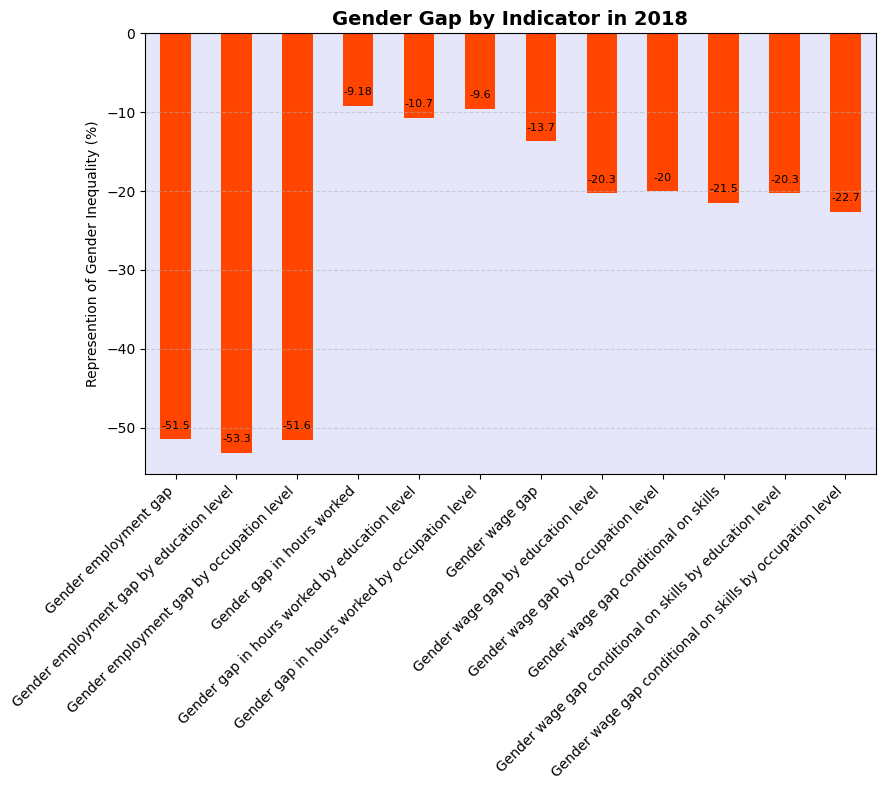

In [42]:
usa_2018_grouped = usa_2018.groupby('Indicator').mean("Value")
# usa_2018_grouped.keys() #use to check keys

#Set the figure and axes objects
fig, ax = plt.subplots(figsize=(9,8))

#Color orangered, used as bar color
color = '#FF4500'

#Plot the grouped data
usa_2018_grouped.plot(kind='bar', y ='Value', ax=ax, color=color)

#Color lavendar
ax.set_facecolor('#E6E6FA')

#Setting labels and axes attributes
ax.set_ylabel('Represention of Gender Inequality (%)')
ax.set_xlabel('')
ax.legend().remove()
ax.yaxis.grid(True, linestyle='dashed', alpha=0.5, zorder=0)
ax.set_title('Gender Gap by Indicator in 2018', fontsize=14, fontweight='bold')

#Display exact values on top of bars, exact values are an average of the indicator groupings
for p in ax.patches:
    ax.annotate(f'{p.get_height(): .3g}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0,10), textcoords='offset points', fontsize=8)

#Changing bucket label orientation for readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

A picture does say a thousand words, but lets not draw any conclusion yet. <bold>FIXME<bold>

<br>The employment gap alone has a gender disparity of -51.5%, with men obviously being the major of the energy work force. While this chart is interesting, and before we can draw some conclusions, it's not really showing the whole picture because there is a calculation error when grouping the indicators. Let me show you. 

In [51]:
sectors = usa_2018['Technology or Sector'].unique().tolist()
sectors

['Important energy consumers',
 'Services/goods that are essential to fixed capital investment with implications for energy supply and use',
 'Non-energy',
 'Energy',
 'Total',
 'Energy generation and distribution']

#### Calculating the mean across sectors is not a proper way to compare gender disparity. Let's isolate the 'Total' sector because these values will be representative of the whole energy sector and it omits non-energy sector data. It would also make sense to do a comparative analysis between non-energy sector and energy sector. 